In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
pd.set_option('display.max_rows', None)

a. Plot the infection curve as a function of time for I(0)=0.01, S(0)=0.99, and Ro=2.
Assume β=0.3 /day, and 𝞬=1/7day.

In [3]:
beta = 0.3
gamma = 1/7

I_0 = 0.01
S_0 = 0.99
r_0 = 0.0

#2 
R_0 = beta/gamma

In [4]:
'''
Simple SIr simulation
Recall that:
                dS/dt = -beta*S*I
                dI/dt = beta*S*I - gamma*I
                dR/dt = gamma*I

Here, we call the solution y(t), where y(t) is a vector [S(t),I(t),R(t)].
The solution tells us what is the state of each group at each time point.

In order to run a simulation, we need to define our ordinary differential equations (ODE) by a function.
The input to this function is the state of the three groups in a single time point - y, and compute how they change  - dy
'''

def dSdt(S,I,b=beta,g=gamma):
    return -b*S*I

def dIdt(S,I,b=beta,g=gamma):
    return b*S*I - g*I

def dRdt(I,g=gamma):
    return g*I

def R_0(beta=beta,gamma=gamma):
    return beta/gamma
    

In [5]:
def SIr(y,t,b=beta):
    
        # define the simulation parameters within the function
        [S,I,R] = y       
        
        dy      = np.empty(3)  
        
        dy[0] = dSdt(S,I,b)
        dy[1] = dIdt(S,I,b) 
        dy[2] = dRdt(I)
        
        return dy
    

In [6]:
'''
Finally, in order to run the simulation we will use a off-the shelf ODE solver, provided within scipy.integrate package

The first argument that this solver recives is the ODE function that we defined.
The seconde argument is the intial condition. Lets start with [0.99,0.01,0], Hence - 1% is infected, no deaths or recoveries
The third argument is the timeframe of the simulation. 

lets simulate 100 days. In order to do so, I use numpy packge to create a vector of 100 days -  
'''
n_days = 100
# Initial conditions
sol = odeint(SIr,[S_0,I_0,r_0],np.arange(0,n_days),args = (beta,))


In [7]:
sir_df = pd.DataFrame(sol,columns=['S','I','R'])

Text(0.5, 1.0, 'Simple SIr model - Infection curve')

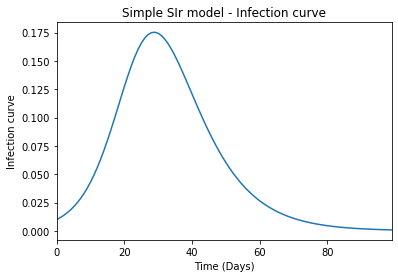

In [8]:
sir_df.I.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curve')
plt.title('Simple SIr model - Infection curve')

----------------------------------------------------------------------

b. Check whether the maximum infection is reached at the point mentioned in the
lecture, and whether the susceptible fraction at long times matches the lecture
prediction.

Peak day of infections 

In [9]:
np.argmax(sir_df.I)

/Users/renee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


29

In [10]:
sir_df.I.max()

0.17525323236989826

Susceptible fraction after 100 days

In [11]:
sir_df.S.iloc[-1]

0.17559655575509708

Susceptible fraction after 10k days

In [12]:
n_long = 10000

In [13]:
sol_long = odeint(SIr,[S_0,I_0,r_0],np.arange(0,n_long),args=(beta,))

In [14]:
sir_longdf = pd.DataFrame(sol_long,columns=['S','I','R'])

In [15]:
sir_longdf.S.iloc[-1]

0.17511600190738888

In [16]:
sir_longdf.R.iloc[-1]

0.8248839980926108

------------------------------------------------------------------

c. What is the value of I(t) at its maximum? Assuming a death rate of 1%, and a
population of 1 million, approximately how many fatalities are expected at the end
of the epidemic based on this simulation? Hint for fatalities: plot r(t), defined as
the fraction recovered or dead. At long times when the epidemic is over,
everyone that has been infected has either recovered or died from the disease.
Another approach is to use the section on S∞ in the lecture notes

In [19]:
peak = sir_df.I.max()

In [20]:
peak

0.17525323236989826

In [21]:
pop = 1e6

Expected fatalities: death rate * all once infected (==r as t -> inf) 

In [22]:
sir_longdf.R.iloc[-1]*pop*0.01

8248.839980926108

-----------------------------------------------------------------------

d. Plot the infection curve for a small value of Ro (choose a value of β that makes
Ro slightly larger than 1) and a large value of Ro. What do you observe about the
curves? (100 words).

In [23]:
beta = 2/13

In [24]:
R_0(beta)

1.076923076923077

Text(0.5, 1.0, 'Simple SIR model with Ro slightly above 1')

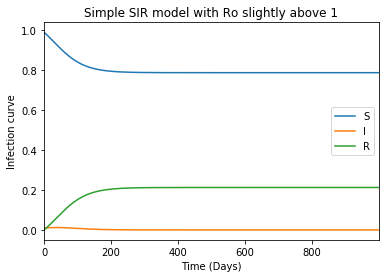

In [25]:
n_days = 1000
# Initial conditions
sir_smro = odeint(SIr,[S_0,I_0,r_0],np.arange(0,n_days),args=(beta,))
sir_smrodf = pd.DataFrame(sir_smro,columns=['S','I','R'])
sir_smrodf.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curve')
plt.title('Simple SIR model with Ro slightly above 1')

In [26]:
sir_smrodf.R.iloc[-1]

0.21252372489984883

In [27]:
sir_smrodf.I.max()

0.011946477412152209

In [28]:
beta = .6

In [29]:
R_0(beta)

4.2

Text(0.5, 1.0, 'Simple SIR model with Ro >> 1')

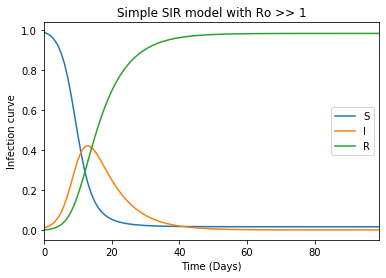

In [30]:
n_days = 100
# Initial conditions
sol_lgro = odeint(SIr,[S_0,I_0,r_0],np.arange(0,n_days),args=(beta,))
sir_lgodf = pd.DataFrame(sol_lgro,columns=['S','I','R'])
sir_lgodf.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curve')
plt.title('Simple SIR model with Ro >> 1')

In [31]:
sir_lgodf.R.iloc[-1]

0.9841230861777946

Reducing Ro demonstrably flattens the curve. Though as long as Ro remains above zero, there will be exponential growth, a smaller R_0 not only draws out the rate of infection but also limits the amount of people who get infected: under the conditions of this simulation, reducing R_0 by just one point- from just above 2 to just above 1- flattens the peak day of infection from a whopping 17.5% to just 1.2% of the population and dramatically reduces the projected percent infected over time from >82% to just over 21%. Conversely, as R_0 increases, the rate of infection curve peaks sooner and steeper, infecting more of the population and R saturates ever closer to 1, requiring nearly all of the populace to be removed from the suscepttibility pool before the pandemic's conclusion. 

---------------------------------------------------------------

e. Plot the infection curve as in a., but now Ro drops to Ro=0.9 at t=5 days due to a
lockdown. What do you observe (50 words).

beta = gamma*R_0

In [32]:
beta = gamma*0.9

In [33]:
beta

0.12857142857142856

In [34]:
#sanity check
R_0(beta=beta)

0.8999999999999999

In [62]:
n_days = 1000

In [63]:
beta = .3
a_days = 5
sol_a = odeint(SIr, [S_0, I_0, r_0], np.arange(0,a_days), args=(beta,))
sir_adf = pd.DataFrame(sol_a,columns=['S','I','R'])

In [64]:
sir_adf

,S,I,R
0,0.990000,0.010000,0.000000
1,0.986795,0.011661,0.001544
2,0.983072,0.013584,0.003344
3,0.978755,0.015805,0.005440
4,0.973760,0.018364,0.007876


In [65]:
beta = gamma*0.9
print('beta',beta)
#sanity check
R_0(beta=beta)

beta 0.12857142857142856


0.8999999999999999

In [66]:
b_days = n_days - a_days
sol_b = odeint(SIr, [sir_adf.S.iloc[-1], sir_adf.I.iloc[-1], sir_adf.R.iloc[-1]], np.arange(a_days,n_days ), args=(beta,))
sir_bdf = pd.DataFrame(sol_b,columns=['S','I','R'])

In [68]:
sir_bdf.head()

,S,I,R
0,0.973760,0.018364,0.007876
1,0.971484,0.018039,0.010476
2,0.969254,0.017716,0.013030
3,0.967069,0.017393,0.015538
4,0.964928,0.017072,0.018000


In [69]:
sirdf = sir_adf.append(sir_bdf[1:])

In [70]:
sirdf.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'Simple SIR model with lockdown at day 5')

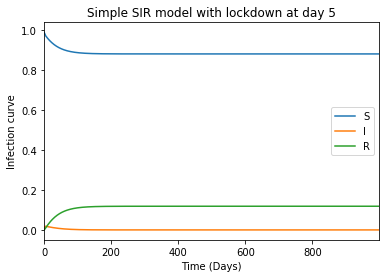

In [71]:
sirdf.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curve')
plt.title('Simple SIR model with lockdown at day 5')

In [72]:
sirdf.R.iloc[-1]

0.11859065743084064

In [74]:
# Peak day of infection
np.argmax(sirdf.I)

4

Text(0.5, 1.0, 'Simple SIR model without lockdown -- compare with projected figures')

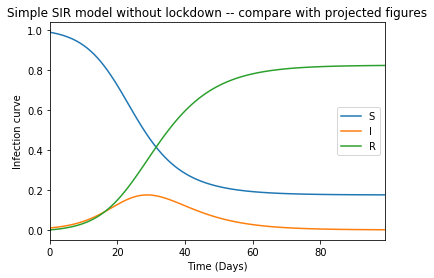

In [78]:
sir_df.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Infection curve')
plt.title('Simple SIR model without lockdown -- compare with projected figures')

In [79]:
sirdf.S.iloc[-1]

0.8814093425821982

As R_0 drops below 1, even ever so slightly, it forces curve inversion: With an Ro >1 to start, I begins its exponential increase days 0-4. Ro tamped down on day 5 effects I to *peak* at day 5 (0-based indexing), effectively flattening the rate of infection. In concert, R drops to 1% of the population, with ~99% of the population spared from infection. Notably, S remains quite high at ~88%, leaving the vast majority of the population susceptible to infection should lockdown measures be disregarded during the throes of the paandemic. 